In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
elementary_1=pd.read_csv('test_1_elementary.csv')
elementary_1=elementary_1[elementary_1.time_finished > 0]
elementary_1=elementary_1.assign(type='elementory')
elementary_1['time_on_task(sec)'] = (elementary_1['time_finished']-elementary_1['time_given'])/1000

basic_1=pd.read_csv('test_1_basic.csv')
basic_1=basic_1[basic_1.time_finished > 0]
basic_1=basic_1.assign(type='basic')
basic_1['time_on_task(sec)'] = (basic_1['time_finished']-basic_1['time_given'])/1000 #столбец:время от появления задачи в стеке до возвращения з-ку 
basic_1, elementary_1 = basic_1.assign(scenario='1'), elementary_1.assign(scenario='1')

elementary_2=pd.read_csv('test_2_elementary.csv')
elementary_2=elementary_2[elementary_2.time_finished > 0]
elementary_2=elementary_2.assign(type='elementory')
elementary_2['time_on_task(sec)'] = (elementary_2['time_finished']-elementary_2['time_given'])/1000

basic_2=pd.read_csv('test_2_basic.csv')
basic_2=basic_2[basic_2.time_finished > 0]
basic_2=basic_2.assign(type='basic')
basic_2['time_on_task(sec)'] = (basic_2['time_finished']-basic_2['time_given'])/1000
basic_2, elementary_2 = basic_2.assign(scenario='2'), elementary_2.assign(scenario='2')

elementary_3=pd.read_csv('test_3_elementary.csv')
elementary_3=elementary_3[elementary_3.time_finished > 0]
elementary_3=elementary_3.assign(type='elementory')
elementary_3['time_on_task(sec)'] = (elementary_3['time_finished']-elementary_3['time_given'])/1000

basic_3=pd.read_csv('test_3_basic.csv')
basic_3=basic_3[basic_3.time_finished > 0]
basic_3=basic_3.assign(type='basic')
basic_3['time_on_task(sec)'] = (basic_3['time_finished']-basic_3['time_given'])/1000
basic_3, elementary_3 = basic_3.assign(scenario='3'), elementary_3.assign(scenario='3')

elementary_4=pd.read_csv('test_4_elementary.csv')
elementary_4=elementary_4[elementary_4.time_finished > 0]
elementary_4=elementary_4.assign(type='elementory')
elementary_4['time_on_task(sec)'] = (elementary_4['time_finished']-elementary_4['time_given'])/1000

basic_4=pd.read_csv('test_4_basic.csv')
basic_4=basic_4[basic_4.time_finished > 0]
basic_4=basic_4.assign(type='basic')
basic_4['time_on_task(sec)'] = (basic_4['time_finished']-basic_4['time_given'])/1000
basic_4, elementary_4 = basic_4.assign(scenario='4'), elementary_4.assign(scenario='4')

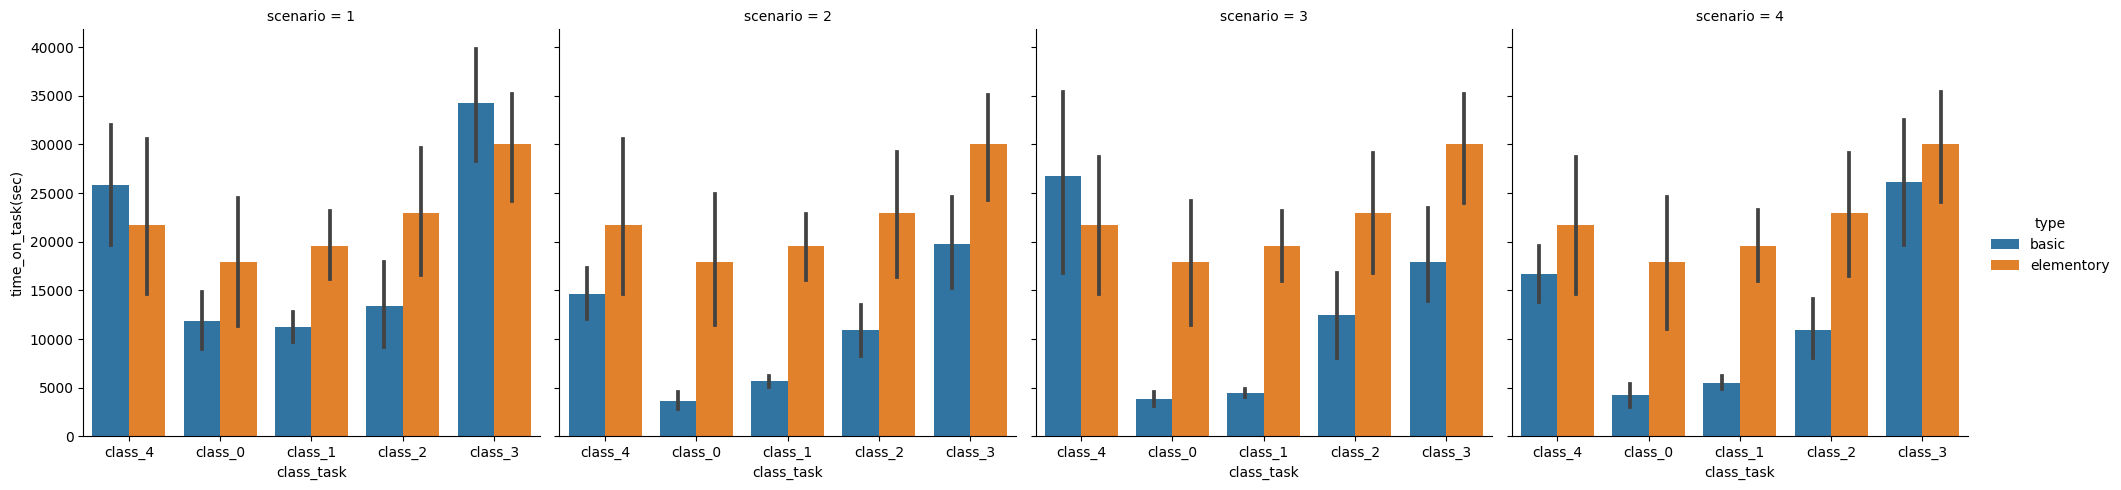

In [19]:
def calc_size(scenario):
    tasks=[0,2500,114779,3878372,8632500,17475000] # max_calc_size из классов задач
    for i in range(len(tasks)-1):
        if (scenario['calc_size'] > tasks[i]) and (scenario['calc_size']<=tasks[i+1]):
            return f'class_{i}'
        
res_1=pd.concat([basic_1,elementary_1,basic_2,elementary_2,basic_3,elementary_3,basic_4,elementary_4])
res_1['class_task']=res_1.apply(calc_size, axis=1)

sns.catplot(x='class_task',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            errorbar=('ci', 90),
            data=res_1)

График среднего времени выполнения задач для разных классов задач **(разной вычислительной сложности)** для 2-х скедулеров и 4-х сценариев. Basic-распределенный, elementary-нераспределенный.

#### Class_task на графике:
class_0: ML: Табличные данные

class_1: Анализ данных

class_2: Рендеринг видео

class_3: ML: Распознавание изображений

class_4: ML: Распознавание речи

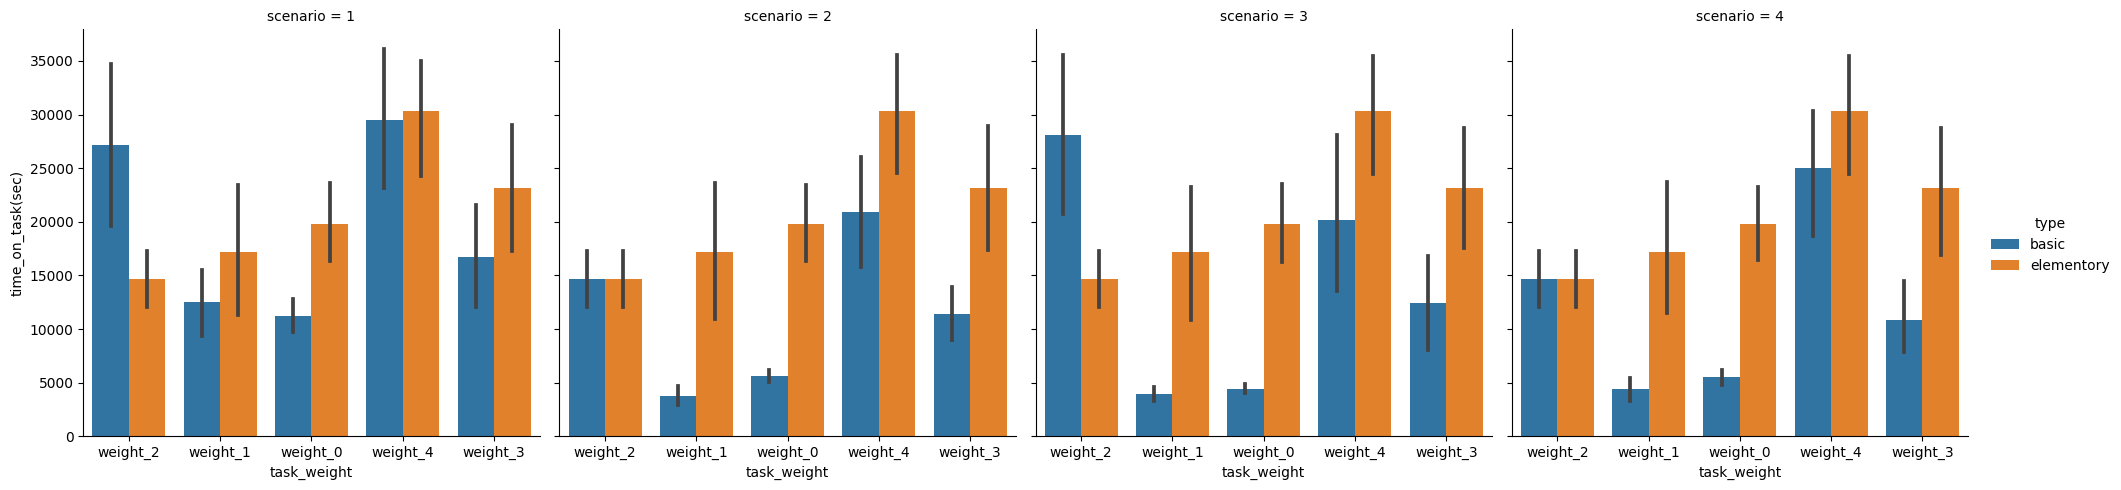

In [20]:
def transfer_weight(scenario):
    tasks=[0,59,200,405,6760,18010] # max_send_size из классов задач
    for i in range(len(tasks)-1):
        if (scenario['transfer_weight'] > tasks[i]) and (scenario['transfer_weight']<=tasks[i+1]) :
            return f'weight_{i}'

res_1['task_weight']=res_1.apply(transfer_weight, axis=1)
sns.catplot(x='task_weight',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            errorbar=('ci', 90),
            data=res_1)

График среднего времени выполнения задач для разных классов задач **(разного веса в Мб)** для 2-х скедулеров и 4-х сценариев. Basic-распределенный, elementary-нераспределенный.

#### Task_weight на графике:
weight_0: Анализ данных

weight_1: ML: Табличные данные

weight_2: ML: Распознавание речи

weight_3: Рендеинг видео

weight_4: ML: Распознавание изображений

In [21]:


def class_power(tasks):
    classes={1:1,2:2,3:3,4:3,5:4,6:4,7:5,8:5,9:6,10:6,11:7,12:8,13:8} # class_power для 1,2,3,4-ого сценария
    for i in classes:
        if tasks['customer_id'] == i:
            return classes[i]

basic_1['class_power']=basic_1.apply(class_power,axis=1)
elementary_1['class_power']=elementary_1.apply(class_power,axis=1)

basic_2['class_power']=basic_2.apply(class_power,axis=1)
elementary_2['class_power']=elementary_2.apply(class_power,axis=1)

basic_3['class_power']=basic_3.apply(class_power,axis=1)
elementary_3['class_power']=elementary_3.apply(class_power,axis=1)

basic_4['class_power']=basic_4.apply(class_power,axis=1)
elementary_4['class_power']=elementary_4.apply(class_power,axis=1)

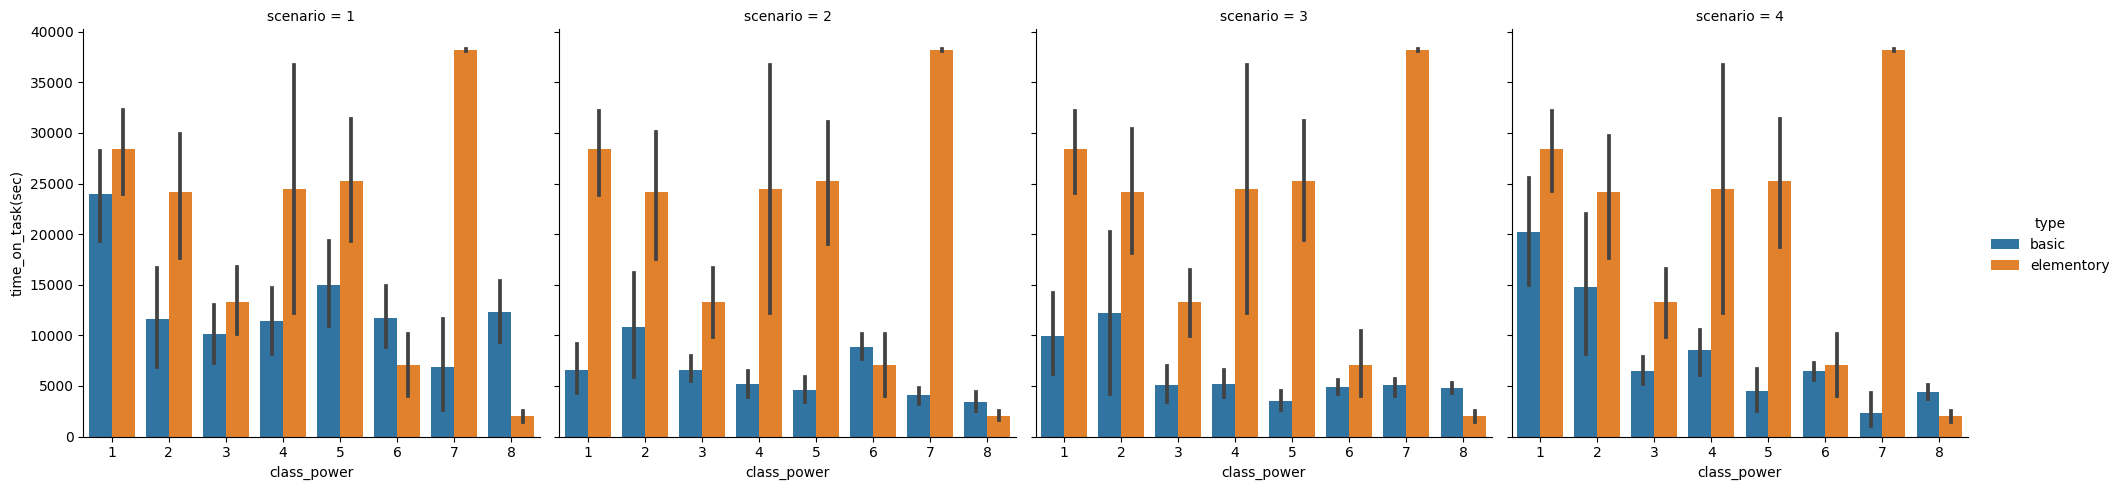

In [22]:
res_2=pd.concat([basic_1,elementary_1,basic_2,elementary_2,basic_3,elementary_3,basic_4,elementary_4])
sns.catplot(x='class_power',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            errorbar=('ci', 90),
            data=res_2)

График среднего времени выполнения задач для **разных типов девайсов** для 2-х скедулеров и 4-х сценариев. Basic-распределенный, elementary-нераспределенный.

#### Class_power на графике:
1: ноутбук мощный

2: ноутбук средний

3: смартфон мощный

4: планшет средний

5: смартфон средний

6: смартфон бюджетный

7: смарт-телевизор

8: смарт-часы

In [23]:
print("\033[1m"+"\033[4mСOUNT OF COMPLETED TASKS:\033[0m")
print()

print("Time of simulation = 43_200_000 ms")
print()

print(f"Сount of completed tasks in 1 scenario (basic scheduler) = {len(basic_1['id'])}")
print(f"Сount of completed tasks in 1 scenario (elementary scheduler) ={len(elementary_1['id'])}")
print()

print(f"Сount of completed tasks in 2 scenario (basic scheduler) = {len(basic_2['id'])}")
print(f"Сount of completed tasks in 2 scenario (elementary scheduler) = {len(elementary_2['id'])}")
print()

print(f"Сount of completed tasks in 3 scenario (basic scheduler) = {len(basic_3['id'])}")
print(f"Сount of completed tasks in 3 scenario (elementary scheduler) = {len(elementary_3['id'])}")
print()

print(f"Сount of completed tasks in 4 scenario (basic scheduler) = {len(basic_4['id'])}")
print(f"Сount of completed tasks in 4 scenario (elementary scheduler) = {len(elementary_4['id'])}")

СOUNT OF COMPLETED TASKS:

Time of simulation = 43_200_000 ms

Сount of completed tasks in 1 scenario (basic scheduler) = 194
Сount of completed tasks in 1 scenario (elementary scheduler) =96

Сount of completed tasks in 2 scenario (basic scheduler) = 174
Сount of completed tasks in 2 scenario (elementary scheduler) = 96

Сount of completed tasks in 3 scenario (basic scheduler) = 151
Сount of completed tasks in 3 scenario (elementary scheduler) = 96

Сount of completed tasks in 4 scenario (basic scheduler) = 112
Сount of completed tasks in 4 scenario (elementary scheduler) = 96


In [24]:
print("\033[1m"+"\033[4mEFFECTIVENESS (CALC_SIZE/TIME_ON_TASK(sec)):\033[0m")
print()

effect_1=(basic_1['calc_size'].sum()/basic_1['time_on_task(sec)'].sum())/(elementary_1['calc_size'].sum()/elementary_1['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 1) = {effect_1}")

effect_2=(basic_2['calc_size'].sum()/basic_2['time_on_task(sec)'].sum())/(elementary_2['calc_size'].sum()/elementary_2['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 2) = {effect_2}")

effect_3=(basic_3['calc_size'].sum()/basic_3['time_on_task(sec)'].sum())/(elementary_3['calc_size'].sum()/elementary_3['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 3) = {effect_3}")

effect_4=(basic_4['calc_size'].sum()/basic_4['time_on_task(sec)'].sum())/(elementary_4['calc_size'].sum()/elementary_4['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 4) = {effect_4}")

EFFECTIVENESS (CALC_SIZE/TIME_ON_TASK(sec)):

Effectiveness basic/elementary (scenario 1) = 0.9915318887221208
Effectiveness basic/elementary (scenario 2) = 1.1009995900763168
Effectiveness basic/elementary (scenario 3) = 1.8332260340555375
Effectiveness basic/elementary (scenario 4) = 1.6710164104182585


In [25]:
print("\033[1m"+"\033[4mMEAN VALUE (TIME ON TASKS(sec)):\033[0m")
print()

print(f"Mean value of basic (1 scenario) = {basic_1['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (1 scenario) = {elementary_1['time_on_task(sec)'].mean()}")
print()

print(f"Mean value of basic (2 scenario) = {basic_2['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (2 scenario) = {elementary_2['time_on_task(sec)'].mean()}")
print()

print(f"Mean value of basic (3 scenario) = {basic_3['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (3 scenario) = {elementary_3['time_on_task(sec)'].mean()}")
print()

print(f"Mean value of basic (4 scenario) = {basic_4['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (4 scenario) = {elementary_4['time_on_task(sec)'].mean()}")

MEAN VALUE (TIME ON TASKS(sec)):

Mean value of basic (1 scenario) = 12743.830824742266
Mean value of elementary (1 scenario) = 20575.3846875

Mean value of basic (2 scenario) = 6000.020114942528
Mean value of elementary (2 scenario) = 20575.3846875

Mean value of basic (3 scenario) = 5609.2164900662265
Mean value of elementary (3 scenario) = 20575.3846875

Mean value of basic (4 scenario) = 6596.836428571428
Mean value of elementary (4 scenario) = 20575.3846875


In [26]:
print("\033[1m"+"\033[4m75 PRECENTAL (TIME ON TASKS(sec)):\033[0m")
print()

print(f"75 precental of basic (1 scenario) = {np.percentile(basic_1['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (1 scenario) = {np.percentile(elementary_1['time_on_task(sec)'] ,75)}")
print()

print(f"75 precental of basic (2 scenario) = {np.percentile(basic_2['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (2 scenario) = {np.percentile(elementary_2['time_on_task(sec)'] ,75)}")
print()

print(f"75 precental of basic (3 scenario) = {np.percentile(basic_3['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (3 scenario) = {np.percentile(elementary_3['time_on_task(sec)'] ,75)}")
print()

print(f"75 precental of basic (4 scenario) = {np.percentile(basic_4['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (4 scenario) = {np.percentile(elementary_4['time_on_task(sec)'] ,75)}")

75 PRECENTAL (TIME ON TASKS(sec)):

75 precental of basic (1 scenario) = 21749.63
75 precental of elementary (1 scenario) = 33751.335

75 precental of basic (2 scenario) = 8937.7975
75 precental of elementary (2 scenario) = 33751.335

75 precental of basic (3 scenario) = 6305.21
75 precental of elementary (3 scenario) = 33751.335

75 precental of basic (4 scenario) = 8634.1975
75 precental of elementary (4 scenario) = 33751.335


In [27]:
print("\033[1m"+"\033[4mDISPERSION (TIME ON TASKS(sec)):\033[0m")
print()

print(f"Dispersion of basic (scenario 1) = {basic_1['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 1) = {elementary_1['time_on_task(sec)'].var()}")
print()

print(f"Dispersion of basic (scenario 2) = {basic_2['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 2) = {elementary_2['time_on_task(sec)'].var()}")
print()

print(f"Dispersion of basic (scenario 3) = {basic_3['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 3) = {elementary_3['time_on_task(sec)'].var()}")
print()

print(f"Dispersion of basic (scenario 4) = {basic_4['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 4) = {elementary_4['time_on_task(sec)'].var()}")

DISPERSION (TIME ON TASKS(sec)):

Dispersion of basic (scenario 1) = 134944642.52349257
Dispersion of elementary (scenario 1) = 245959946.05731988

Dispersion of basic (scenario 2) = 23209986.592687845
Dispersion of elementary (scenario 2) = 245959946.05731988

Dispersion of basic (scenario 3) = 34246330.60775226
Dispersion of elementary (scenario 3) = 245959946.05731988

Dispersion of basic (scenario 4) = 34972137.66270425
Dispersion of elementary (scenario 4) = 245959946.05731988


In [28]:
print("\033[1m"+"\033[4mMAX AND MIN (TIME ON TASKS(sec)):\033[0m")
print()

print(f"Max value of basic (scenario 1) = {basic_1['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 1) = {basic_1['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 1) = {elementary_1['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 1) = {elementary_1['time_on_task(sec)'].min()}")
print()

print(f"Max value of basic (scenario 2) = {basic_2['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 2) = {basic_2['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 2) = {elementary_2['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 2) = {elementary_2['time_on_task(sec)'].min()}")
print()

print(f"Max value of basic (scenario 3) = {basic_3['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 3) = {basic_3['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 3) = {elementary_3['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 3) = {elementary_3['time_on_task(sec)'].min()}")
print()

print(f"Max value of basic (scenario 4) = {basic_4['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 4) = {basic_4['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 4) = {elementary_4['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 4) = {elementary_4['time_on_task(sec)'].min()}")

MAX AND MIN (TIME ON TASKS(sec)):

Max value of basic (scenario 1) = 43121.91
Min value of basic (scenario 1) = 0.14

Max value of elementary (scenario 1) = 42320.41
Min value of elemntary (scenario 1) = 0.59

Max value of basic (scenario 2) = 27335.25
Min value of basic (scenario 2) = 0.15

Max value of elementary (scenario 2) = 42320.41
Min value of elemntary (scenario 2) = 0.59

Max value of basic (scenario 3) = 40676.26
Min value of basic (scenario 3) = 2.17

Max value of elementary (scenario 3) = 42320.41
Min value of elemntary (scenario 3) = 0.59

Max value of basic (scenario 4) = 37325.29
Min value of basic (scenario 4) = 0.89

Max value of elementary (scenario 4) = 42320.41
Min value of elemntary (scenario 4) = 0.59
